# BUILDING THAT MACD

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'str'>
Kraken secren data type: <class 'str'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [4]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['BTC/USD']['symbol']

'BTC/USD'

In [5]:
# Import data as a Pandas DataFrame
crypto_df = pd.DataFrame(crypto_details)

# Display sample data
crypto_df

,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,ZRX/EUR,ZRX/GBP,ZRX/USD,ZRX/BTC,USD/CAD,USD/JPY
percentage,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
tierBased,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
taker,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,...,0.0026,0.0026,0.002,0.002,0.0026,0.0026,0.0026,0.0026,0.002,0.0
maker,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,...,0.0016,0.0016,0.002,0.002,0.0016,0.0016,0.0016,0.0016,0.002,0.0
tiers,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...",...,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000..."
precision,"{'amount': 8, 'price': 2}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 7}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 5}",...,"{'amount': 8, 'price': 0}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 8}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}"
limits,"{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...",...,"{'amount': {'min': 0.00015, 'max': 100000000.0...","{'amount': {'min': 0.00015, 'max': 100000000.0...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ..."
id,AAVEAUD,AAVEETH,AAVEEUR,AAVEGBP,AAVEUSD,AAVEXBT,ADAAUD,ADAETH,ADAEUR,ADAGBP,...,YFIUSD,YFIXBT,ZEURZUSD,ZGBPZUSD,ZRXEUR,ZRXGBP,ZRXUSD,ZRXXBT,ZUSDZCAD,ZUSDZJPY
symbol,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,ZRX/EUR,ZRX/GBP,ZRX/USD,ZRX/BTC,USD/CAD,USD/JPY
base,AAVE,AAVE,AAVE,AAVE,AAVE,AAVE,ADA,ADA,ADA,ADA,...,YFI,YFI,EUR,GBP,ZRX,ZRX,ZRX,ZRX,USD,USD


### List Available Cryptocurrencies for Trading

In [6]:
# Print column values of DataFrame
# print(type(crypto_df.columns.values))
# print(len(crypto_df.columns.values))
pairs = crypto_df.columns.values
pairs_df = pd.DataFrame(pairs, columns=['pairs'])
pairs_df.shape

(356, 1)

In [7]:
#Create numpy array identifying which pairs contain USDT pairs
usdt_bool_np = pairs_df.pairs.str.contains("/USDT")

# Add USDT numpy array boolean pairs to dataframe
pairs_df['USDT'] = usdt_bool_np

#remove pairs without USDT
pairs_df = pairs_df[pairs_df.USDT != False]

#reset the index, drop extraneous columns
pairs_df = pairs_df.reset_index()
pairs_df = pairs_df.drop(columns=['index', 'USDT'])

pairs_df

,pairs
0,ADA/USDT
1,BCH/USDT
2,DAI/USDT
3,DOT/USDT
4,EOS/USDT
5,ETH/USDT
6,LINK/USDT
7,LTC/USDT
8,USDC/USDT
9,BTC/USDT


### Fetch Historical Data for LINK/USDT

In [8]:
# Fetch daily candlestick bar data from `BTC/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1619960400000, 39.41862, 39.59094, 39.29932, 39.29932, 148.10018646]

In [9]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume
0,1619953200000,39.86956,39.89085,39.36055,39.89085,542.865580
1,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593
2,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186
3,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166
4,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782


'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [10]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume,date
0,1619953200000,39.86956,39.89085,39.36055,39.89085,542.865580,2021-05-02 11:00:00
1,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593,2021-05-02 12:00:00
2,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186,2021-05-02 13:00:00
3,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166,2021-05-02 14:00:00
4,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782,2021-05-02 15:00:00


'_________________________'

'historical_prices_df shape: (720, 7)'

In [11]:
historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df

,timestamp,open,high,low,close,volume
date,,,,,,
2021-05-02 11:00:00,1619953200000,39.86956,39.89085,39.36055,39.89085,542.865580
2021-05-02 12:00:00,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593
2021-05-02 13:00:00,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186
2021-05-02 14:00:00,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166
2021-05-02 15:00:00,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782
...,...,...,...,...,...,...
2021-06-01 06:00:00,1622527200000,31.31337,31.33171,30.48776,30.58471,2159.708270
2021-06-01 07:00:00,1622530800000,30.68889,30.68892,30.40129,30.65638,1055.010497
2021-06-01 08:00:00,1622534400000,30.72982,30.83993,29.23452,29.56691,4590.277355


### Plot Daily Returns

In [12]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].dropna().pct_change()
historical_prices_df

,timestamp,open,high,low,close,volume,daily_return
date,,,,,,,
2021-05-02 11:00:00,1619953200000,39.86956,39.89085,39.36055,39.89085,542.865580,NaN
2021-05-02 12:00:00,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593,-0.005586
2021-05-02 13:00:00,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186,-0.009294
2021-05-02 14:00:00,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166,0.013797
2021-05-02 15:00:00,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782,-0.011570
...,...,...,...,...,...,...,...
2021-06-01 06:00:00,1622527200000,31.31337,31.33171,30.48776,30.58471,2159.708270,-0.025798
2021-06-01 07:00:00,1622530800000,30.68889,30.68892,30.40129,30.65638,1055.010497,0.002343
2021-06-01 08:00:00,1622534400000,30.72982,30.83993,29.23452,29.56691,4590.277355,-0.035538


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)

In [13]:
# Set short and long windows
short_window = 9
long_window = 20

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['fast_close'] = historical_prices_df['close'].ewm(halflife=short_window).mean()
historical_prices_df['slow_close'] = historical_prices_df['close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
historical_prices_df['crossover_long'] = np.where(historical_prices_df['fast_close'] > historical_prices_df['slow_close'], 1.0, 0.0)
historical_prices_df['crossover_short'] = np.where(historical_prices_df['fast_close'] < historical_prices_df['slow_close'], -1.0, 0.0)
historical_prices_df['crossover_signal'] = historical_prices_df['crossover_long'] + historical_prices_df['crossover_short']

historical_prices_df.head()

,timestamp,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
date,,,,,,,,,,,,
2021-05-02 11:00:00,1619953200000,39.86956,39.89085,39.36055,39.89085,542.865580,NaN,39.890850,39.890850,0.0,0.0,0.0
2021-05-02 12:00:00,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593,-0.005586,39.775136,39.777494,0.0,-1.0,-1.0
2021-05-02 13:00:00,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186,-0.009294,39.604171,39.612548,0.0,-1.0,-1.0
2021-05-02 14:00:00,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166,0.013797,39.670531,39.672803,0.0,-1.0,-1.0
2021-05-02 15:00:00,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782,-0.011570,39.603284,39.610239,0.0,-1.0,-1.0


### Plot Exponential Moving Average of Closing Prices

<AxesSubplot:xlabel='date'>

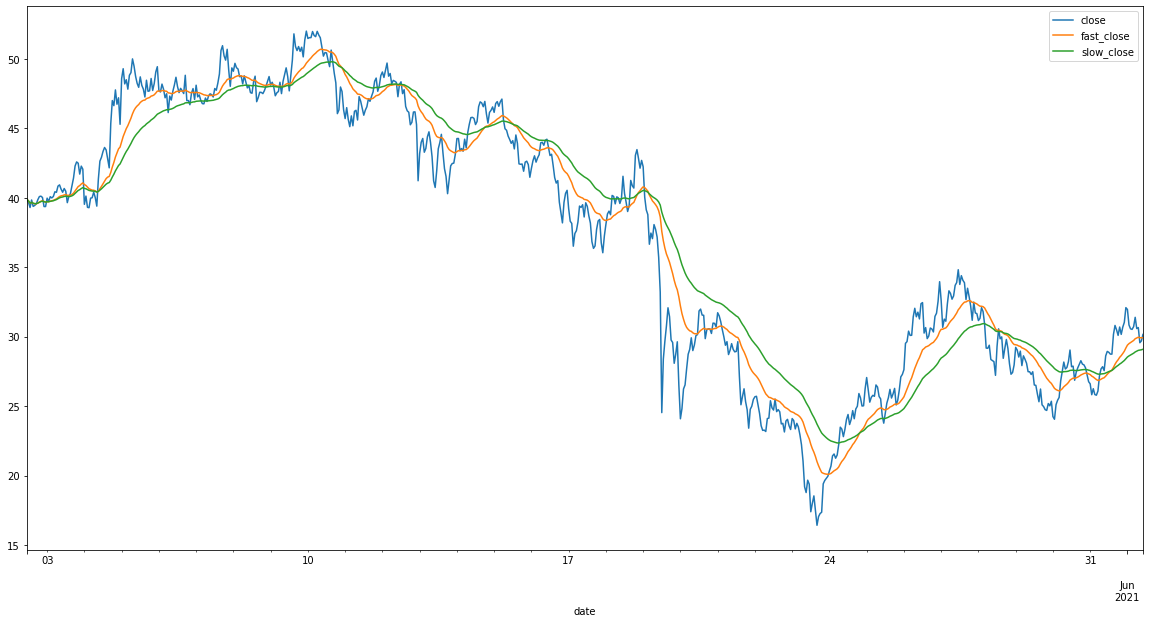

In [14]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [15]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.head()

,timestamp,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,,
2021-05-02 11:00:00,1619953200000,39.86956,39.89085,39.36055,39.89085,542.865580,NaN,39.890850,39.890850,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-05-02 12:00:00,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593,-0.005586,39.775136,39.777494,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-05-02 13:00:00,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186,-0.009294,39.604171,39.612548,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-05-02 14:00:00,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166,0.013797,39.670531,39.672803,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-05-02 15:00:00,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782,-0.011570,39.603284,39.610239,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


### Plot Bollinger Bands

<AxesSubplot:xlabel='date'>

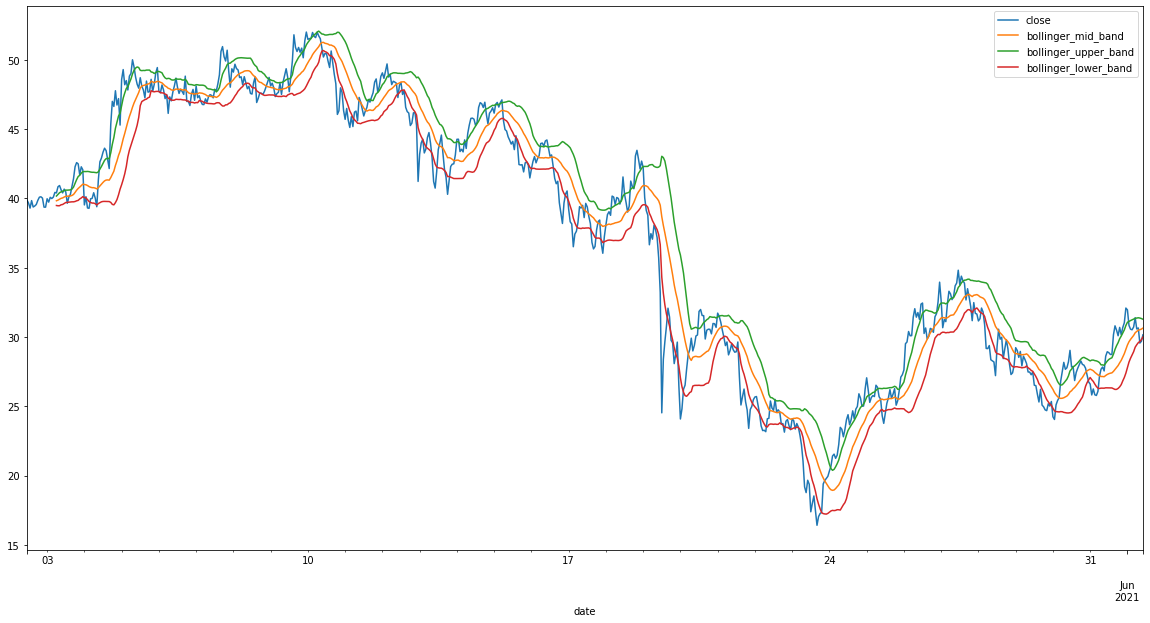

In [16]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

### Build MACD Signals

In [25]:
# Set short and long windows
mac_short_window = 12
mac_long_window = 26
signal_window = 9

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_close'] = historical_prices_df['close'].ewm(span=mac_short_window, adjust=False).mean()
historical_prices_df['mac_slow_close'] = historical_prices_df['close'].ewm(span=mac_long_window, adjust=False).mean()
# historical_prices_df['macd'] = historical_prices_df['fast_close'] - historical_prices_df['slow_close']

macd = historical_prices_df['mac_fast_close'] - historical_prices_df['mac_slow_close']
signal = macd.ewm(span=9, adjust=False).mean()

historical_prices_df['macd'] = macd
historical_prices_df['signal'] = signal



historical_prices_df.head()

,timestamp,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,...,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,mac_fast_close,mac_slow_close,macd,signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-02 11:00:00,1619953200000,39.86956,39.89085,39.36055,39.89085,542.865580,NaN,39.890850,39.890850,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,39.890850,39.890850,0.000000,0.000000
2021-05-02 12:00:00,1619956800000,39.74614,39.78000,39.59347,39.66800,1200.819593,-0.005586,39.775136,39.777494,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,39.856565,39.874343,-0.017777,-0.003555
2021-05-02 13:00:00,1619960400000,39.41862,39.59094,39.29932,39.29932,148.100186,-0.009294,39.604171,39.612548,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,39.770835,39.831748,-0.060913,-0.015027
2021-05-02 14:00:00,1619964000000,39.30508,39.84153,39.23683,39.84153,153.933166,0.013797,39.670531,39.672803,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,39.781711,39.832473,-0.050761,-0.022174
2021-05-02 15:00:00,1619967600000,39.56227,39.66358,39.38058,39.38058,1138.201782,-0.011570,39.603284,39.610239,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,39.719999,39.798999,-0.079000,-0.033539


<AxesSubplot:xlabel='date'>

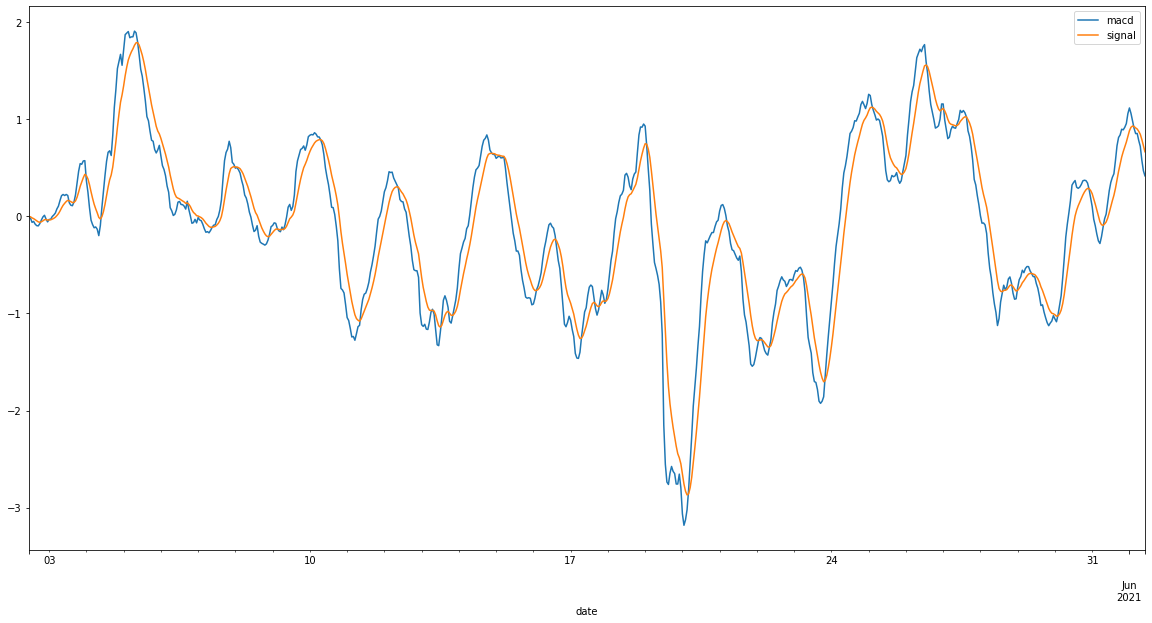

In [26]:
# historical_prices_df[['close','macd','macd_signal']].plot(figsize=(20,10))

historical_prices_df[['macd','signal']].plot(figsize=(20,10))